In [131]:
import pandas as pd 

import seaborn as sns

import numpy as np 

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

from scipy import stats 
from scipy.stats import norm    

from sklearn import preprocessing, metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import csv

import warnings
warnings.filterwarnings('ignore')

In [132]:
dataFrame = pd.read_csv('KS_train_data.csv')

In [133]:
print(dataFrame.columns)

Index(['project_id', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'created_at', 'currency',
       'deadline', 'fx_rate', 'goal', 'launched_at', 'name', 'pledged',
       'staff_pick', 'usd_pledged', 'location', 'funded', 'subcategory',
       'project_url', 'reward_url'],
      dtype='object')


In [134]:
dataFrame.head(10)

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url
0,KS_000000,80,I will be an artist-in-residence at Elsewhere ...,art,3596,US,1325980505,USD,1334866560,1.0,...,1332969260,Elsewhere Studios artist-in-residency program!,3596.00,False,3596.00,"Paonia, CO",True,mixed media,https://www.kickstarter.com/projects/hilaryeme...,https://www.kickstarter.com/projects/hilaryeme...
1,KS_000001,82,1000 Artists is a public art-making installati...,art,4586,US,1330926084,USD,1336440145,1.0,...,1332984145,1000 Artists: Presidential Inauguration 2013,4586.00,False,4586.00,"Washington, DC",True,public art,https://www.kickstarter.com/projects/17146650/...,https://www.kickstarter.com/projects/17146650/...
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneH...",art,5217,US,1332382894,USD,1338175739,1.0,...,1332991739,MyPhoneHenge,5217.00,False,5217.00,"Frisco, TX",True,sculpture,https://www.kickstarter.com/projects/belveal/m...,https://www.kickstarter.com/projects/belveal/m...
3,KS_000003,37,A film exploring the role and value of art edu...,art,7160,GB,1332342451,USD,1334806096,1.0,...,1332991696,Walk-Through,7160.00,False,7160.00,"Glasgow, UK",True,art,https://www.kickstarter.com/projects/107813091...,https://www.kickstarter.com/projects/107813091...
4,KS_000004,153,We need to build a kitchen for Habitable Space...,art,15445,US,1328562617,USD,1335584240,1.0,...,1332992240,A kitchen for Habitable Spaces,15445.00,False,15445.00,"Kingsbury, TX",True,public art,https://www.kickstarter.com/projects/104409276...,https://www.kickstarter.com/projects/104409276...
5,KS_000005,18,Source Material is 2 person exhibition of the ...,art,2190,US,1331239703,USD,1336090320,1.0,...,1333017856,Source Material: Works by Brian Dupont and Chr...,2190.00,False,2190.00,"Houston, TX",True,painting,https://www.kickstarter.com/projects/973860748...,https://www.kickstarter.com/projects/973860748...
6,KS_000006,156,An anthropological field study of the Dwarven ...,art,5429,US,1332802530,USD,1334030340,1.0,...,1333045464,A Book of Dwarves,5429.95,False,5429.95,"Chicago, IL",True,art,https://www.kickstarter.com/projects/136757708...,https://www.kickstarter.com/projects/136757708...
7,KS_000007,479,Portrait artist seeks funds to kickstart an ex...,art,62736,US,1331325438,USD,1335671940,1.0,...,1332822807,Drawing a Drawing 365,62736.01,True,62736.01,"New Britain, CT",True,painting,https://www.kickstarter.com/projects/michaelsh...,https://www.kickstarter.com/projects/michaelsh...
8,KS_000008,41,This is a month long Residency at the The Verm...,art,2930,US,1331904129,USD,1336736610,1.0,...,1332848610,The Vermont Studio Center Artist Residency Pro...,2930.00,True,2930.00,"Johnson, VT",True,painting,https://www.kickstarter.com/projects/106325273...,https://www.kickstarter.com/projects/106325273...
9,KS_000009,25,"Art, Music, and Theater live on the Waterfront...",art,5001,US,1330979179,USD,1335443088,1.0,...,1332851088,Arts on the Waterfront,5001.00,False,5001.00,"Seattle, WA",True,public art,https://www.kickstarter.com/projects/139851890...,https://www.kickstarter.com/projects/139851890...


***
```
COL's VARS:

1)project_id
2)backers_count : number of supporters of the project (quantitative)
3)blurb : description of the project (qualitative)
4)category (qualitative)
5)converted_pledged_amount : funding amount ?? (quantitative). It's into integers
6)country (qualitative)
7)created_at (quantitative)
8)currency (qualitative)
9)deadline (quanatitative)
10)fx_rate : exchange rate (quantitative)
11)goal : goal of expected fundings (quantitative)
12)launched_at: (quantitative)
13)name : name of the project (qualitative)
14)pledged : funding amount ?? (quantitative). It's into floats (.00)
15)staff_pick : projects picked or not picked (Boolean -> True/False)
16)usd_pledged : funding amount in dollars ?? (quantitative). It's into floats (.00) != pledged
17)location: City, State(abbreviation)/Country 
18)funded : projects funded or not funded (Boolean -> True/False) --> MOST IMPORTANT
19)subcategory (qualitative)
20)project_url (link)
21)reward_url (link)

```
***

In [135]:
dataFrame['funded'].describe()

count     100000
unique         2
top         True
freq       58454
Name: funded, dtype: object

***
```
Most projects have been funded (58454) compared to (41546) not funded

```
***

***
```

List of COL's VARS which might not be relevant:

3)blurb 
20)project_url
21)reward_url 
16)usd_pledged 

```
***

***
```

Check if the dataFrame.usd_pledged != dataFrame.pledged or equal to be eliminated --> they are different 

```
***

In [136]:
gains = dataFrame[dataFrame.usd_pledged != dataFrame.pledged]
print(gains)

      project_id  backers_count  \
997    KS_000997              4   
998    KS_000998              1   
1005   KS_001005              4   
1012   KS_001012              5   
1022   KS_001022              1   
...          ...            ...   
99976  KS_099976            187   
99981  KS_099981             97   
99984  KS_099984            128   
99990  KS_099990             59   
99999  KS_099999            145   

                                                   blurb category  \
997    "SPLASH OUT THE SOUND PROJECT"! We makes ceram...      art   
998    Tell me about your taste and i will create a p...      art   
1005   Series of artistic pieces in ceramics, inspire...      art   
1012   A gorgeously illustrated, vintage inspired cal...      art   
1022   we are creating a ceramics studio within our s...      art   
...                                                  ...      ...   
99976  Love comedy? Get involved in creating a dedica...  theater   
99981  We're an affordable 

***
```

We are going to eliminate these 3 variables as they are not usefull for the analysis 
3)blurb 
20)project_url
21)reward_url 


```
***

In [137]:
dataFrame = dataFrame.drop(columns=['converted_pledged_amount','backers_count','usd_pledged','pledged'])
#'blurb','project_url', 'reward_url',

In [138]:
duplicateRows = dataFrame[dataFrame.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [project_id, blurb, category, country, created_at, currency, deadline, fx_rate, goal, launched_at, name, staff_pick, location, funded, subcategory, project_url, reward_url]
Index: []


There are no duplicate rows.

In [139]:
(dataFrame.isnull()).sum()

project_id     0
blurb          2
category       0
country        3
created_at     0
currency       0
deadline       0
fx_rate        0
goal           0
launched_at    0
name           1
staff_pick     0
location       0
funded         0
subcategory    0
project_url    0
reward_url     0
dtype: int64

In [146]:
dataFrame = dataFrame.dropna(how='any',axis=0)

In [147]:
(dataFrame.isnull()).sum()

project_id        0
blurb             0
category          0
country           0
created_at        0
currency          0
deadline          0
fx_rate           0
goal              0
launched_at       0
name              0
staff_pick        0
location          0
funded            0
subcategory       0
project_url       0
reward_url        0
category_no       0
subcategory_no    0
dtype: int64

We removed all the rows with null v alues

<AxesSubplot:>

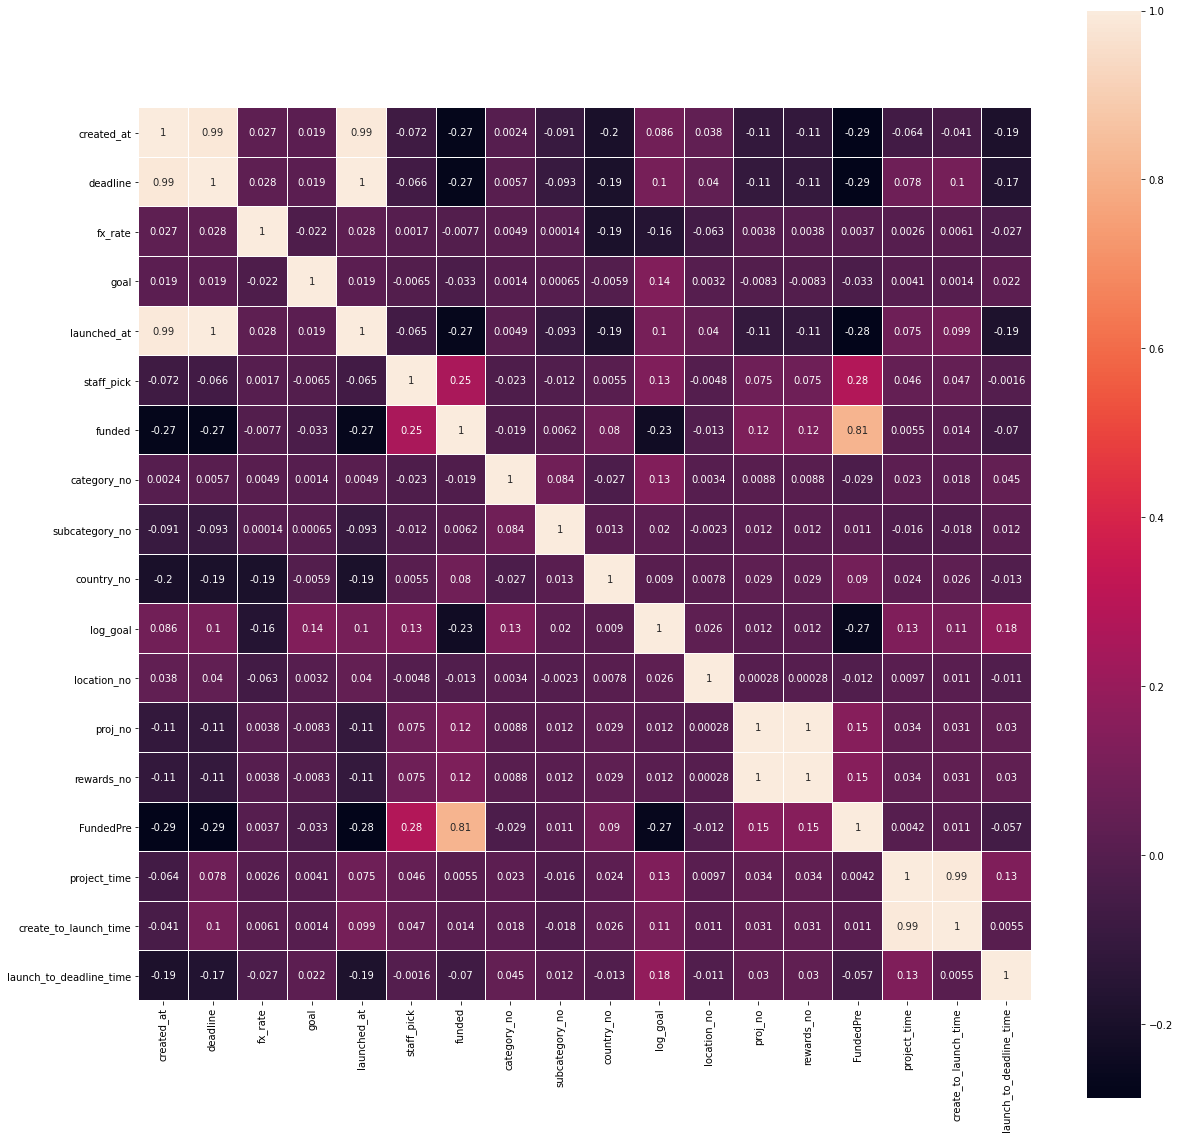

In [180]:
le = LabelEncoder()
dataFrame['category_no'] = le.fit_transform(dataFrame['category'])
dataFrame['subcategory_no'] = le.fit_transform(dataFrame['subcategory'])
dataFrame['country_no'] = le.fit_transform(dataFrame['country'])
dataFrame['location_no'] = le.fit_transform(dataFrame['location'])
dataFrame['proj_no'] = le.fit_transform(dataFrame['project_url'])
dataFrame['rewards_no'] = le.fit_transform(dataFrame['reward_url'])

corrmat = dataFrame.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corrmat, square= True, annot = True, linewidths=.1, ax=ax)

The 10 features which most strongly correlate with <i>funded</i>

<AxesSubplot:>

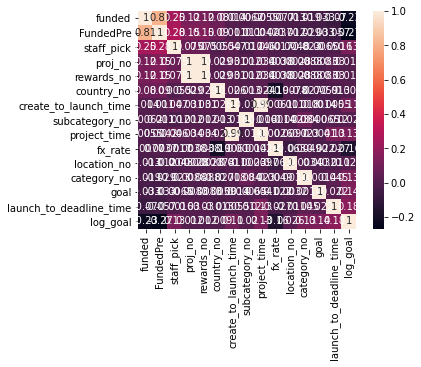

In [181]:
corrmat = dataFrame.corr()
cols = corrmat.nlargest(15, 'funded').index
sns.heatmap(corrmat.loc[cols, cols], square= True, annot = True)

The variable which correlates the most with funded is staff_pick. It is followed by backers_count and all the money-rellated variables. The least correlated ones are the time-frame-related ones, like launched_at and deadline

Check if all the values of the most relevant columns are consistent with each other

In [116]:
np.issubdtype(dataFrame['goal'].dtype, np.number)

True

In [118]:
np.issubdtype(dataFrame['deadline'].dtype, np.number)

True

In [120]:
np.issubdtype(dataFrame['launched_at'].dtype, np.number)

True

In [47]:
np.issubdtype(dataFrame['staff_pick'].dtype, np.bool)

True

In [48]:
np.issubdtype(dataFrame['funded'].dtype, np.bool)

True

There are no typos

In [49]:
dataFrame.converted_pledged_amount.describe()

count    9.999600e+04
mean     1.241151e+04
std      1.005565e+05
min      0.000000e+00
25%      1.250000e+02
50%      1.650000e+03
75%      6.272000e+03
max      1.026684e+07
Name: converted_pledged_amount, dtype: float64

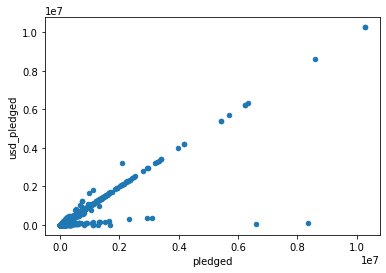

In [50]:
ax = dataFrame.plot.scatter(x = "pledged", y = "usd_pledged")

Boxplot represantion of the funded amount for each category

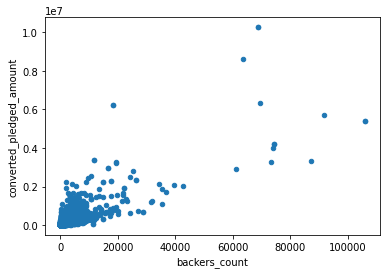

In [52]:
ax = dataFrame.plot.scatter(x = "backers_count", y = "converted_pledged_amount")

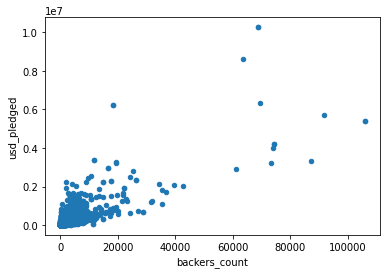

In [53]:
ax = dataFrame.plot.scatter(x = "backers_count", y = "usd_pledged")

We used this call to see the number of total projects that are left after data cleaning

Boxplot that represents the funded amount for each category

<AxesSubplot:xlabel='converted_pledged_amount', ylabel='category'>

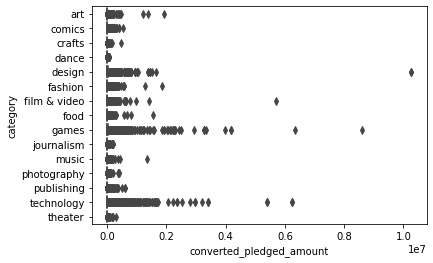

In [54]:
usd_pledged = dataFrame['converted_pledged_amount']
category = dataFrame['category']
sns.boxplot(x=usd_pledged, y=category)

Check the funded amount for each category

This boxplot is used in order to see the values that are above the upper bound of the currency column

Drop some outliers of the converted_pledged_amount variable based on its Upper-bound values

<AxesSubplot:xlabel='converted_pledged_amount', ylabel='currency'>

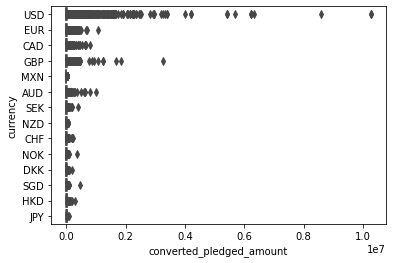

In [55]:
sns.boxplot(x=dataFrame.converted_pledged_amount, y = dataFrame.currency)

 Caps outliers to closest existing value within threshold (IQR).
 Identifying the upper bound for most relevant quantitative variables, and dropping the outliers accordingly

In [56]:
def cap_outliers(series, iqr_threshold=1.5, verbose=False):
    '''Caps outliers to closest existing value within threshold (IQR).'''
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lbound = Q1 - iqr_threshold * IQR
    ubound = Q3 + iqr_threshold * IQR

    outliers = (series < lbound) | (series > ubound)

    series = series.copy()
    series.loc[series < lbound] = series.loc[~outliers].min()
    series.loc[series > ubound] = series.loc[~outliers].max()

    # For comparison purposes.
    if verbose:
            print('\n'.join(
                ['Capping outliers by the IQR method:',
                 f'   IQR threshold: {iqr_threshold}',
                 f'   Lower bound: {lbound}',
                 f'   Upper bound: {ubound}\n']))

    return series

In [57]:
cap_outliers(dataFrame['goal'], verbose=True)
converted_pledged_amount_to_drop_upper_bound = dataFrame.index[dataFrame.goal > 27750]
converted_pledged_amount_to_drop_lower_bound = dataFrame.index[dataFrame.goal < -14250]
dataFrame.drop(converted_pledged_amount_to_drop_lower_bound, inplace=True)
dataFrame.drop(converted_pledged_amount_to_drop_upper_bound, inplace=True)
dataFrame.goal.describe()

Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -14250.0
   Upper bound: 27750.0



count    87573.000000
mean      5904.542394
std       6214.822798
min          0.010000
25%       1300.000000
50%       3500.000000
75%       8500.000000
max      27750.000000
Name: goal, dtype: float64

Derive a new column called funded_amount_per_backer as the first additional feature, and check if it was funded, if thats the case divide them, else assign 0.

In [58]:
dataFrame['funded_amount_per_backer'] = np.where(dataFrame['funded'] == True , 
                                                 dataFrame.converted_pledged_amount / dataFrame.backers_count,
                                                0)
dataFrame.funded_amount_per_backer = dataFrame.funded_amount_per_backer.round(2)
dataFrame.head(3)

,project_id,backers_count,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,funded_amount_per_backer
0,KS_000000,80,art,3596,US,1325980505,USD,1334866560,1.0,2800.0,1332969260,Elsewhere Studios artist-in-residency program!,3596.0,False,3596.0,"Paonia, CO",True,mixed media,44.95
1,KS_000001,82,art,4586,US,1330926084,USD,1336440145,1.0,4500.0,1332984145,1000 Artists: Presidential Inauguration 2013,4586.0,False,4586.0,"Washington, DC",True,public art,55.93
2,KS_000002,21,art,5217,US,1332382894,USD,1338175739,1.0,5000.0,1332991739,MyPhoneHenge,5217.0,False,5217.0,"Frisco, TX",True,sculpture,248.43


Addition of the second feature named project_time which represents the duration of the project since its creation until its deadline.

In [169]:
dataFrame['project_time'] = [ row.deadline - row.created_at for index, row in dataFrame.iterrows() ]
dataFrame['create_to_launch_time'] = [ row.launched_at - row.created_at for index, row in dataFrame.iterrows() ]
dataFrame['launch_to_deadline_time'] = [ row.deadline - row.launched_at for index, row in dataFrame.iterrows() ]

<AxesSubplot:>

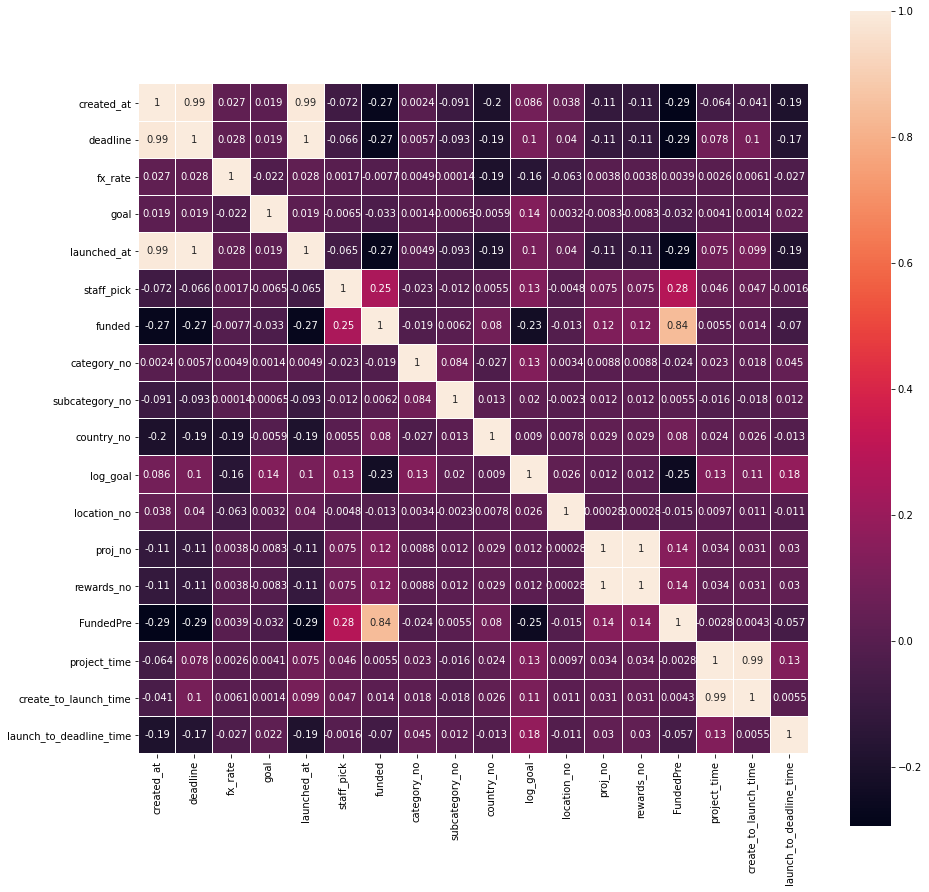

In [170]:
dataFrame.head(3)

corrmat = dataFrame.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corrmat, square= True, annot = True, linewidths=.1, ax=ax)

Reminder : Normalize the data with log-transformation before modelling !!!

In [61]:
# stats.probplot(dataFrame.goal,plot=plt)
# dataFrame['log_goal'] = np.where(dataFrame['funded'] == True , np.log(dataFrame.goal), 0)
# stats.probplot(dataFrame.log_backers_count,plot=plt)

Logistic Regression Model

In [63]:
df = pd.DataFrame(dataFrame)
le = LabelEncoder()

dataFrame['category_no'] = le.fit_transform(dataFrame['category'])
dataFrame['subcategory_no'] = le.fit_transform(dataFrame['subcategory'])
dataFrame['country_no'] = le.fit_transform(dataFrame['country'])

dataFrame['log_goal'] = np.log(dataFrame.goal)
x = dataFrame[['goal','category_no','subcategory_no','country_no','project_time']]  # Known features
y = dataFrame.funded

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

modelTest = LogisticRegression()
modelTest.fit(x,y)
print (modelTest.score(x,y))

0.633071837210099


((array([-4.31780279, -4.11778948, -4.00895578, ...,  4.00895578,
          4.11778948,  4.31780279]),
  array([1.e-02, 1.e+00, 1.e+00, ..., 1.e+08, 1.e+08, 1.e+08])),
 (127821.46151084098, 43705.422609358, 0.0974013357491875))

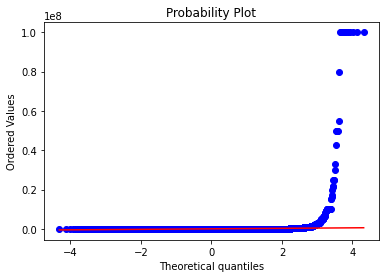

In [173]:
stats.probplot(dataFrame["goal"],plot=plt)

Random Forest

In [186]:
le = LabelEncoder()

#dataFrame['log_goal'] = np.log(dataFrame['goal'])
# Creating numeric versions of categorical columns
#dataFrame['category_no'] = le.fit_transform(dataFrame['category'])
#dataFrame['subcategory_no'] = le.fit_transform(dataFrame['subcategory'])
#dataFrame['country_no'] = le.fit_transform(dataFrame['country'])
#dataFrame['location_no'] = le.fit_transform(dataFrame['location'])

from sklearn.ensemble import RandomForestClassifier

X = dataFrame[['goal', 'category_no', 'subcategory_no', 'staff_pick','country_no','proj_no','rewards_no','fx_rate']]  # Known features
y = dataFrame['funded']  # To be predicted

# Split the dataset into a training- and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1) #train, val, test set will be 60%, 20%, 20% 

# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model with the training features
clf.fit(X_train,y_train)

y_pred = clf.predict(X_val)

# Correctness of the classifier (slightly different everytime)
print('Acuuracy score is {}%'.format(metrics.accuracy_score(y_val, y_pred) * 100))


dataFrame['FundedPre'] = clf.predict(X)
dataFrame.funded.describe()

Acuuracy score is 77.57887894394719%


count     99995
unique        2
top        True
freq      58452
Name: funded, dtype: object

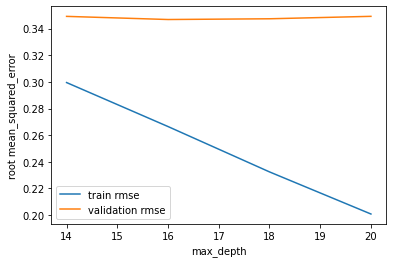

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_errors = []
valid_errors = []
param_range = [14,16,18,20]

for max_depth in param_range:
    random_forest = RandomForestRegressor(max_depth=max_depth, n_estimators=100, random_state=1)
    random_forest.fit(X_train, y_train)
    
    train_errors.append(np.sqrt(mean_squared_error(y_train, random_forest.predict(X_train))))
    valid_errors.append(np.sqrt(mean_squared_error(y_test, random_forest.predict(X_test))))
    
plt.xlabel('max_depth')
plt.ylabel('root mean_squared_error')
plt.plot(param_range, train_errors, label="train")
plt.plot(param_range, valid_errors, label="validation")
plt.legend()
plt.show()

From graph we find that the best max_depth 18, which is right before an small increase in root mean_square_error of validation.

In [122]:
clf = RandomForestClassifier(n_estimators=100,max_depth = 18)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

# Correctness of the classifier (slightly different everytime)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print (clf.score(X_test,y_test))

dataFrame['FundedPre'] = clf.predict(X)
dataFrame.FundedPre.describe()

Accuracy: 0.8135728089121291
0.8135728089121291


count     87968
unique        2
top        True
freq      45741
Name: FundedPre, dtype: object

Using the new max_depth, we get a better accuracy with almost 1%.

Code to split set in train,val,test set 60,20,20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1) #train, val, test set will be 60%, 20%, 20% 

Neural Network Model

In [285]:
# model = Sequential()
# model.add(Dense(1, input_shape=(3,)))

# model.compile(Adam(lr=i), 'mean_squared_error')

# history = model.fit(x_train, y_train, epochs = 500, validation_split = 0.1, verbose = 0)
# history_dict = history.history


In [311]:
#le = LabelEncoder()

#dataFrame['log_goal'] = np.log(dataFrame['goal'])
# Creating numeric versions of categorical columns
#dataFrame['category_no'] = le.fit_transform(dataFrame['category'])
#dataFrame['subcategory_no'] = le.fit_transform(dataFrame['subcategory'])
#dataFrame['country_no'] = le.fit_transform(dataFrame['country'])
#dataFrame['location_no'] = le.fit_transform(dataFrame['location'])
#from sklearn.neighbors import KNeighborsClassifier
#X =dataFrame[['goal', 'category_no', 'subcategory_no', 'staff_pick','launched_at']]  # Known features
#y = dataFrame['funded']  # To be predicted
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#neigh = KNeighborsClassifier(n_neighbors = 5)
#neigh.fit(X, y)
#y_pred = neigh.predict(X_test)

#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7813269675268084


Acuuracy score is 0.6455609477590637
35


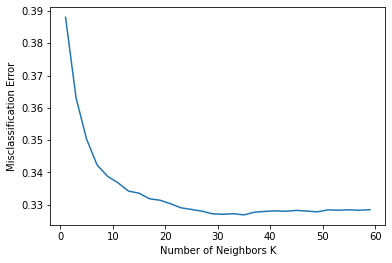

In [77]:
le = LabelEncoder()

dataFrame['log_goal'] = np.log(dataFrame['goal'])
# Creating numeric versions of categorical columns
dataFrame['category_no'] = le.fit_transform(dataFrame['category'])
dataFrame['subcategory_no'] = le.fit_transform(dataFrame['subcategory'])
dataFrame['country_no'] = le.fit_transform(dataFrame['country'])
dataFrame['location_no'] = le.fit_transform(dataFrame['location'])

from sklearn.ensemble import RandomForestClassifier

X = dataFrame[['log_goal', 'category_no', 'subcategory_no', 'staff_pick','launched_at','deadline']]  # Known features
y = dataFrame['funded']  # To be predicted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train,y_train)
y_pred = knn1.predict(X_test)
print('Acuuracy score is {}'.format(metrics.accuracy_score(y_test, y_pred)))

from sklearn.model_selection import cross_val_score
#hyper parameter tuning.Selecting best K
neighbors = [x for x in range(1,60) if x % 2 != 0]
# empty list that will hold cv scores
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
#graphical view
#misclassification error
MSE = [1-x for x in cv_scores]
#optimal K
optimal_k_index = MSE.index(min(MSE))
optimal_k = neighbors[optimal_k_index]
print(optimal_k)
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()



In [112]:
X = dataFrame[['goal', 'category_no', 'subcategory_no', 'staff_pick','launched_at','deadline','project_time','country_no']]  # Known features
y = dataFrame['funded']  # To be predicted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors = 35)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Acuuracy score is {}%'.format(metrics.accuracy_score(y_test, y_pred) * 100))

Acuuracy score is 69.4376248929489%


Training data set addition of new columns 

In [93]:
dataFrameTest = pd.read_csv('KS_test_data.csv', delimiter=';')
#dfTest = pd.DataFrame(dataFrameTest)
le = LabelEncoder()

dataFrameTest['category_no'] = le.fit_transform(dataFrameTest['category'])
dataFrameTest['subcategory_no'] = le.fit_transform(dataFrameTest['subcategory'])
#dfTest['country_no'] = le.fit_transform(dfTest['country'])
dataFrameTest['project_time'] = [ row.deadline - row.created_at for index, row in dataFrameTest.iterrows() ]
dataFrameTest['log_goal'] = np.log(dataFrameTest.goal)


In [94]:
dataFrameTest.head(10)

,project_id,blurb,category,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,staff_pick,location,subcategory,project_url,reward_url,category_no,subcategory_no,project_time,log_goal
0,KS_100000,We are looking to bring a Visiting Sculptor fr...,art,US,1330727362,USD,1334959598,1.0,3900.0,1332972398,Martin Luther King Jr. Sculpture on Campus!,False,"Bakersfield, CA",art,https://www.kickstarter.com/projects/153685020...,https://www.kickstarter.com/projects/153685020...,0,10,4232236,8.268732
1,KS_100001,Surrealistic oil paintings capturing the metam...,art,US,1332598567,USD,1334635140,1.0,750.0,1332975679,EMERGENCE: Surreal Oil Paintings by J.J. Long,False,"Lowell, MA",painting,https://www.kickstarter.com/projects/203971390...,https://www.kickstarter.com/projects/203971390...,0,95,2036573,6.620073
2,KS_100002,P.M.A.F.T.W. my upcoming solo show June 2012 a...,art,US,1332476607,USD,1333421843,1.0,1000.0,1332989843,P.M.A.F.T.W.,False,"Portland, OR",painting,https://www.kickstarter.com/projects/144231475...,https://www.kickstarter.com/projects/144231475...,0,95,945236,6.907755
3,KS_100003,A series of images about the art/artist and lo...,art,US,1327538509,USD,1338231398,1.0,15000.0,1333047398,MetropoLOVE - Book project to be completed fro...,False,"Imlay, NV",public art,https://www.kickstarter.com/projects/199636585...,https://www.kickstarter.com/projects/199636585...,0,113,10692889,9.615805
4,KS_100004,Become a part of the first crowd-funded commun...,art,US,1332705528,USD,1334606400,1.0,4200.0,1333049586,DS106: The Open Online Community of Digital St...,True,"Fredericksburg, VA",digital art,https://www.kickstarter.com/projects/jimgroom/...,https://www.kickstarter.com/projects/jimgroom/...,0,36,1900872,8.342840
5,KS_100005,I will be creating an artist book edition at M...,art,US,1330042590,USD,1335758400,1.0,2500.0,1332961593,"Everything You Hear (working title), an artist...",False,"Minneapolis, MN",mixed media,https://www.kickstarter.com/projects/938956896...,https://www.kickstarter.com/projects/938956896...,0,86,5715810,7.824046
6,KS_100006,Inside these pages are the building blocks of ...,art,US,1321976772,USD,1335559247,1.0,9000.0,1332967247,"Hot Rod Illustration #101, Drawing AUTOS WITH ...",False,"Sharon, VT",illustration,https://www.kickstarter.com/projects/832720854...,https://www.kickstarter.com/projects/832720854...,0,69,13582475,9.104980
7,KS_100007,Bobo's Bayou will be making its debut at the M...,art,US,1329377445,USD,1331971953,1.0,3500.0,1329383553,Bobo's Bayou,False,"Missoula, MT",public art,https://www.kickstarter.com/projects/338398024...,https://www.kickstarter.com/projects/338398024...,0,113,2594508,8.160518
8,KS_100008,Larger metal creatures arise in this undergrad...,art,US,1329226762,USD,1332727200,1.0,700.0,1329431235,Resurrection: The Spirits in Metal,True,"Bridgewater, VA",sculpture,https://www.kickstarter.com/projects/161524146...,https://www.kickstarter.com/projects/161524146...,0,127,3500438,6.551080
9,KS_100009,This is a Salsa Concept Video. I am choreogra...,art,US,1329504699,USD,1330995600,1.0,1500.0,1329530087,Night Before Salsa Concept Video,False,"Hollywood, Los Angeles, CA",performance art,https://www.kickstarter.com/projects/danelladu...,https://www.kickstarter.com/projects/danelladu...,0,97,1490901,7.313220


In [98]:
x=dataFrameTest[['goal', 'category_no', 'subcategory_no', 'staff_pick','launched_at','deadline']]
dataFrameTest['funded'] = clf.predict(x)
dataFrameTest.funded.describe()

count     78065
unique        2
top        True
freq      45009
Name: funded, dtype: object

Create predictions.tsv file and save project_id and funded prediction 

<!-- We maybe removed too much data as now the countis 73906 out of 100K -->

In [110]:
dataFrameTest.to_csv('predictions.tsv', sep='\t', columns=['project_id','funded'], header=False, index=False)